# NYC_Fare_Analysis

We used a different data set for data analysis.

Dataset: https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data from Kaggle

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

%matplotlib inline

sns.set_style('whitegrid')

# Load Data

In [4]:
df_train = pd.read_csv('/Users/kyungminpark/Desktop/Fall2023/CS4641/NYC/train.csv',nrows=200000, parse_dates=["pickup_datetime"])


# Data Analysis

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                200000 non-null  object             
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [6]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [7]:
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

# Data Pre-Processing
### Minimum Fare-Amount is Negative, so we remove these observations

In [8]:
df_train = df_train[df_train["fare_amount"] >= 0]

len(df_train)

199987

### Histogram of fare amount

/var/folders/4_/9dfcxpjn2r3158gls76bxt3h0000gn/T/ipykernel_9125/2952739130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train["fare_amount"] < 100]["fare_amount"], kde=False);


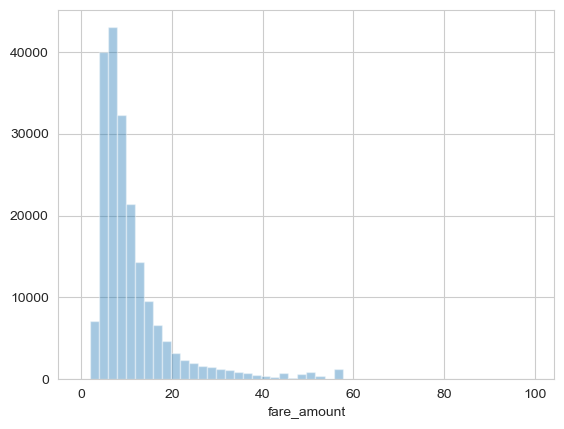

In [9]:
sns.distplot(df_train[df_train["fare_amount"] < 100]["fare_amount"], kde=False);


### Remove Missing Data

In [10]:
print(df_train.isnull().sum())


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [11]:
df_train = df_train.dropna(how='any', axis='rows')

len(df_train)

199986

# Test data

In [12]:
df_test = pd.read_csv('/Users/kyungminpark/Desktop/Fall2023/CS4641/NYC/test.csv')


In [13]:
df_test.head(4)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1


In [14]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


## NYC Coordinates are below:
### Cited by -  https://www.travelmath.com/cities/New+York,+NY

In [15]:
latitude =  40.7141667
longitude =  -74.0063889

#### We will try to define bounding box of interest by [long_min, long_max, latt_min, latt_max] using the minimum and maximum coordinates from test.csv

#### This will help us to make sure to train a model for the full pickup/dropoff co-ordinate range for the test set.

### Minimum and Maximum Longitude Test set

In [16]:
print(min(df_test["pickup_longitude"].min(), df_test["dropoff_longitude"].min()))
print(max(df_test["pickup_longitude"].max(), df_test["dropoff_longitude"].max()))

print(min(df_train["pickup_longitude"].min(), df_train["dropoff_longitude"].min()))
print(max(df_train["pickup_longitude"].max(), df_train["dropoff_longitude"].max()))


-74.263242
-72.986532
-1251.19589
2140.60116


### Minimum and Maximum Latutude Test Set

In [17]:
print(min(df_test["pickup_latitude"].min(), df_test["dropoff_latitude"].min()))
print(max(df_test["pickup_latitude"].max(), df_test["dropoff_latitude"].max()))

print(min(df_train["pickup_latitude"].min(), df_train["dropoff_latitude"].min()))
print(max(df_train["pickup_latitude"].max(), df_train["dropoff_latitude"].max()))


40.568973
41.709555
-3116.285383
1703.092772


## Function for selecting the bounding box

In [27]:
def select_within_boundingbox(df, BoundingBox):
    return ((df["pickup_longitude"] >= BoundingBox[0]) & (df["pickup_longitude"] <= BoundingBox[1]) & 
            (df["pickup_latitude"] >= BoundingBox[2]) & (df["pickup_latitude"] <= BoundingBox[3]) &
            (df["dropoff_longitude"] >= BoundingBox[0]) & (df["dropoff_longitude"] <= BoundingBox[1]) &
            (df["dropoff_latitude"] >= BoundingBox[2]) & (df["dropoff_latitude"] <= BoundingBox[3]))

### Load Image of NYC Map for Visualization

In [28]:
BoundingBox = (-74.3, -73.0, 40.6, 41.7)
nyc_map = Image.open('/Users/kyungminpark/Desktop/Fall2023/CS4641/NYC/NYC_Road_Map.jpg')

df_train = df_train[select_within_boundingbox(df_train, BoundingBox)]
print("New size {}".format(len(df_train)))

New size 195612


### Function will be used for plotting data on NYC Map

In [29]:
def plot_on_map(df, BoundingBox, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(16, 10))
    axs[0].scatter(df["pickup_longitude"], df["pickup_latitude"], alpha = alpha, c='r', s=s)
    axs[0].set_xlim((BoundingBox[0], BoundingBox[1]))
    axs[0].set_ylim((BoundingBox[2], BoundingBox[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map, extent=BoundingBox)
    
    axs[1].scatter(df["dropoff_longitude"], df["dropoff_latitude"] , alpha = alpha, c='b', s=s)
    axs[1].set_xlim((BoundingBox[0], BoundingBox[1]))
    axs[1].set_ylim((BoundingBox[2], BoundingBox[3]))
    axs[1].set_title('Dropoff Locations')
    axs[1].imshow(nyc_map, extent=BoundingBox)

### Plotting Training Data on map

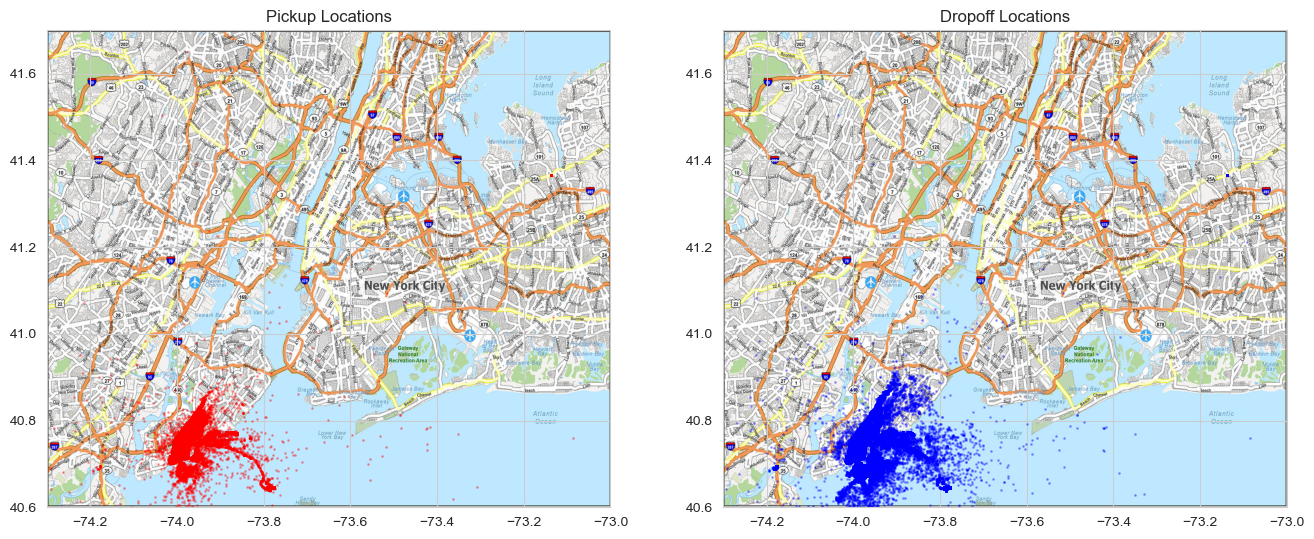

In [30]:
plot_on_map(df_train, BoundingBox, nyc_map, s=1, alpha=0.3)


### Plotting testing Data on Map

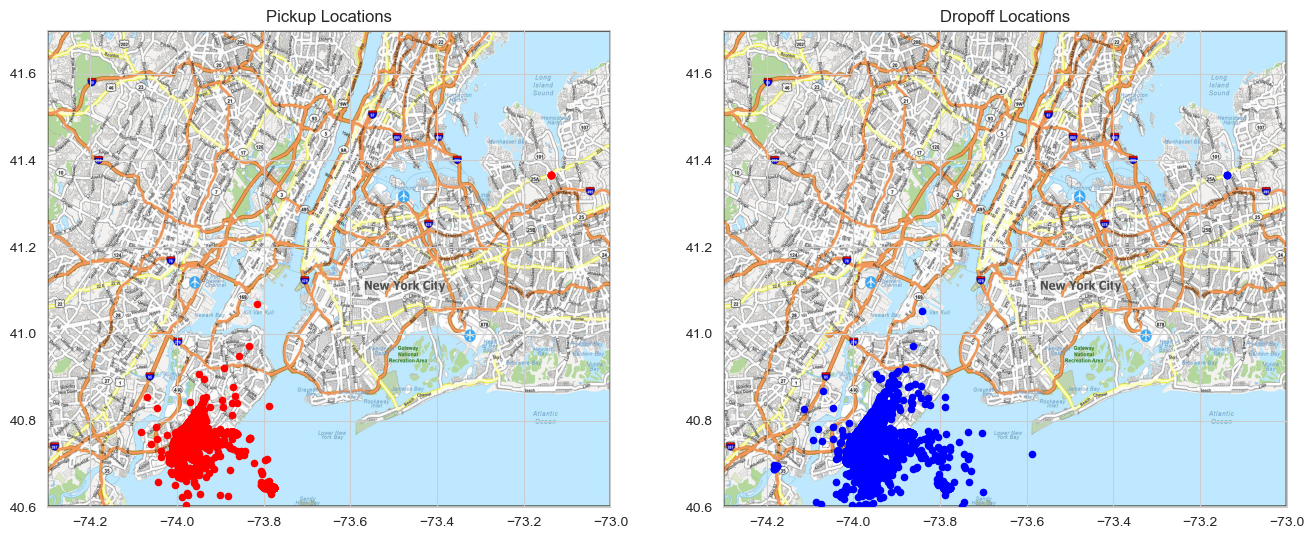

In [32]:
plot_on_map(df_test, BoundingBox, nyc_map, alpha=1.0, s=20)

### Another Visualization (Scatter Plot)

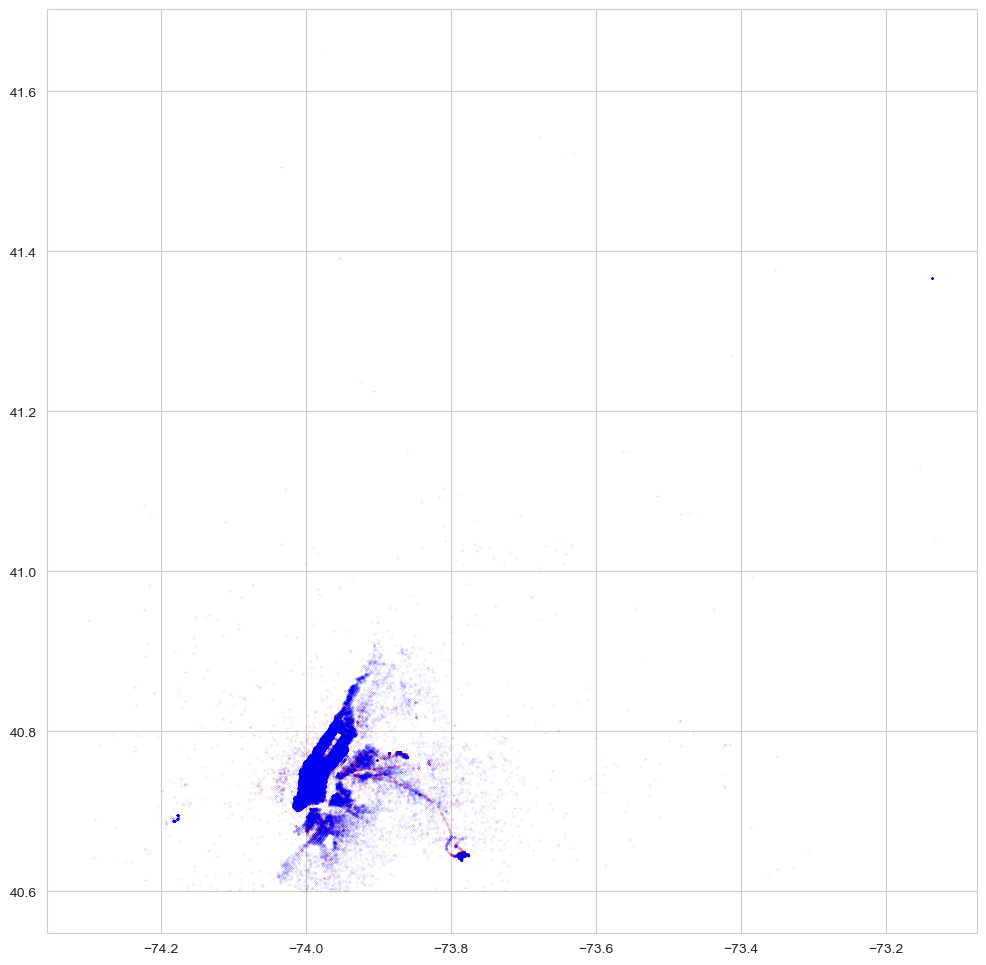

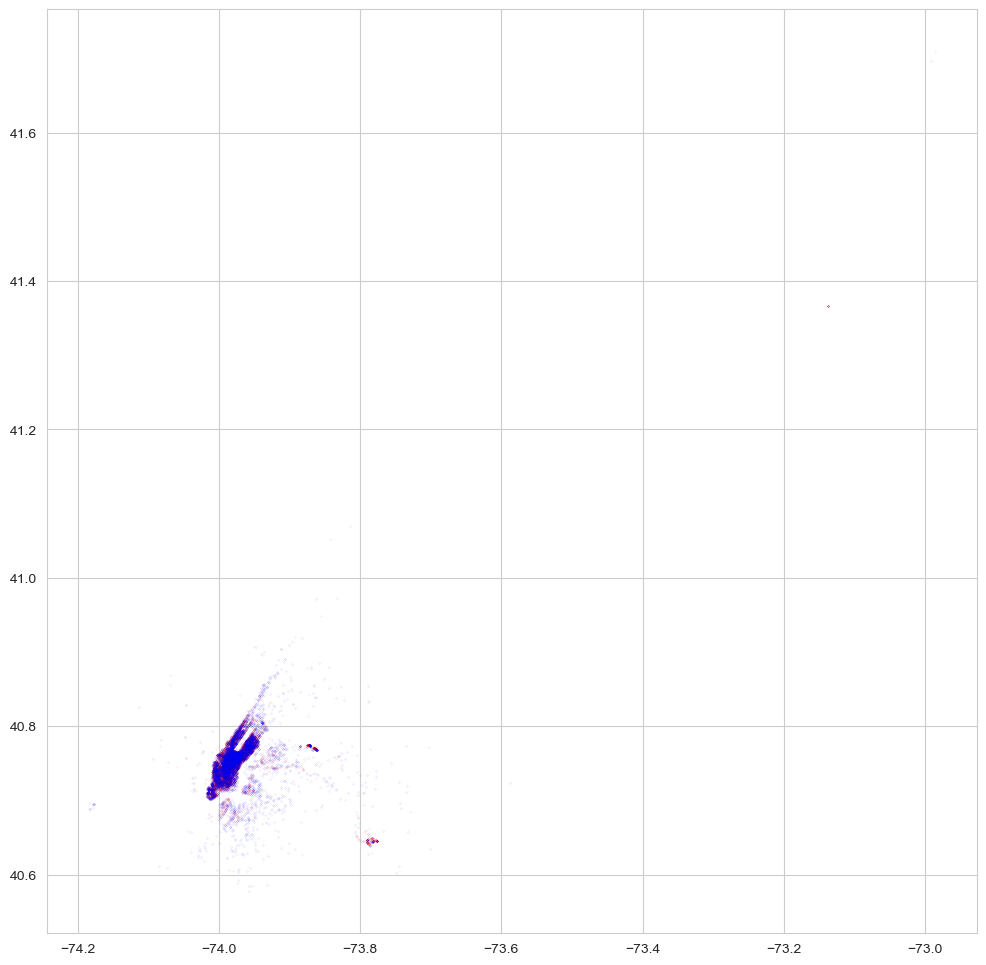

In [33]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)
    
plot_hires(df_train, (-74.3, -73.1, 40.6, 41.65))
plot_hires(df_test, (-74.26, -72.98, 40.57, 41.71))

# Distance and Time Visualization

### 1. The longer the distance between pickup and dropoff locations, the higher the fare.
### 2. Some trips, like to/from an airport are fixed fee.
### 3. Fare at night is different from the day time.

## Formula to be used for calculating the distance latitude and longitude

#### Haversine Formula: This formula calculates the distance between two points on a sphere given their longitudes and latitudes. It's a crucial function for navigation and is used extensively in geolocation applications to find the shortest path between two coordinates on the Earth.

#### The Haversine formula is expressed mathematically as follows:
#### a = $sin^2\left(\frac{\Delta \phi}{2}\right) + \cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\Delta \lambda}{2}\right)$
#### c = $2 \cdot \text{atan2}\left(\sqrt{a}, \sqrt{1-a}\right)$
#### d = $R \cdot c$
#### where:
####  $\phi_1$ and $\phi_2$ are the latitudes of the two points in radians,
####     $\Delta \phi$ is the difference between the two latitudes,
####     $\lambda_1$ and $\lambda_2$ are the longitudes of the two points in radians,
####     $\Delta \lambda$ is the difference between the two longitudes,
####     $R$ is the Earth's radius (approximately 6371 kilometers),
####     $a$ is the haversine of the central angle between the points,
####    $c$ is the central angle in radians,
####     $d$ is the distance between the two points.

In [34]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

### The longer the distance between pickup and dropoff location, higher the fare. 
### Adding new column to dataframe with distance in miles

In [35]:
df_train["distance_miles"] = distance(df_train["pickup_latitude"], df_train["pickup_longitude"], 
                                      df_train["dropoff_latitude"], df_train["dropoff_longitude"])
df_train.head(2)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_miles
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.640487
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5.250670


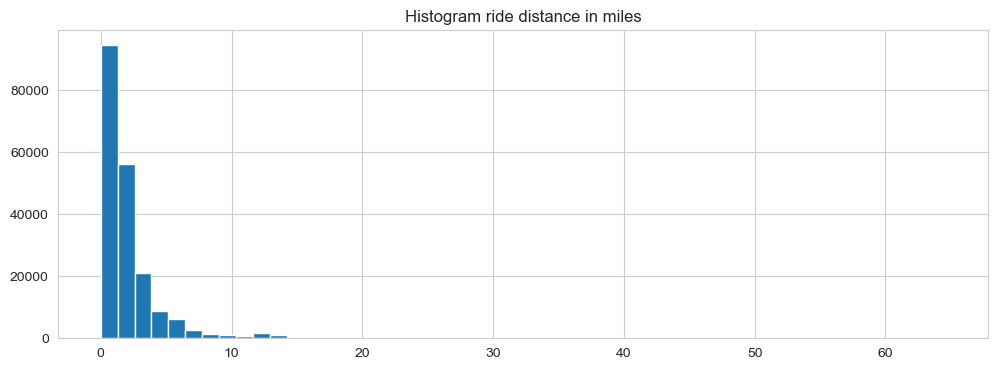

In [36]:
df_train["distance_miles"].hist(bins=50, figsize=(12,4))
plt.title("Histogram ride distance in miles");

In [37]:
df_train["distance_miles"].describe()

count    195612.000000
mean          2.063410
std           2.352008
min           0.000000
25%           0.780419
50%           1.337858
75%           2.423327
max          64.644331
Name: distance_miles, dtype: float64

#### ** When we look at the result, It seems most rides are just short rides, with a small peak at ~13 miles. 
#### ** This peak could be due to airport drives.

In [40]:
df_train.groupby('passenger_count')[['distance_miles', 'fare_amount']].mean()


,distance_miles,fare_amount
passenger_count,,
0,1.836291,9.080659
1,2.035126,11.169553
2,2.174035,11.786048
3,2.070869,11.332867
4,2.126675,11.680824
5,2.066121,11.172870
6,2.168814,12.354238


### Scatter Plot distance vs Fare

Text(0.5, 1.0, 'Zoom in on distance < 15 mile and fare < $100')

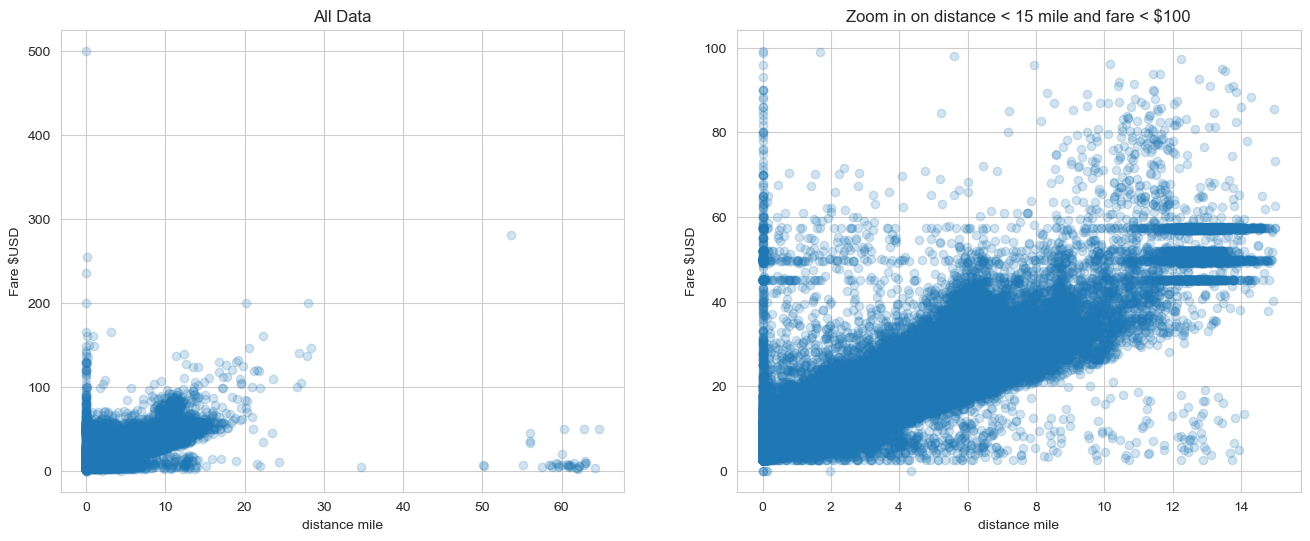

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(df_train["distance_miles"], df_train["fare_amount"], alpha=0.2)
axs[0].set_xlabel("distance mile")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")

# Zoom-in some part of the data
idx = ((df_train['distance_miles'] < 15) & (df_train["fare_amount"] < 100))
axs[1].scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_amount"], alpha=0.2)
axs[1].set_xlabel("distance mile")
axs[1].set_ylabel("Fare $USD")
axs[1].set_title("Zoom in on distance < 15 mile and fare < $100")

#### Observations:


There are trips with zero distance but with a non-zero fare. Predicting these fares will be difficult as there is likely not sufficient information in the dataset.
There are some trips with >50 miles travel distance but low fare. Perhaps these are discounted trips.
The horizontal lines in the right plot might indicate again the fixed fare trips to/from JFK airport.
Overall there seems to be a (linear) relation between distance and fare with an average rate of +/- 100/20 = 5 $USD/mile

# JFK Airport Coordinates:
Link - https://www.travelmath.com/airport/JFK

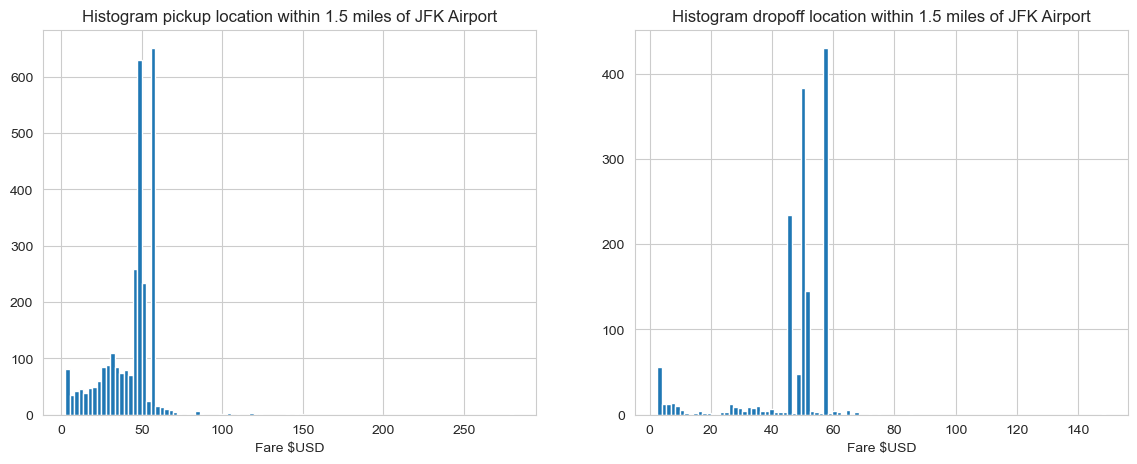

In [42]:
jfk = (-73.7822222222,40.6441666667)
nyc = (-74.0063889, 40.7141667)

def plot_location_fare(loc, name, range=1.5):
    # select all datapoints with dropoff location within range of airport
    fig, axs = plt.subplots(1,2, figsize=(14,5))
    idx = (distance(df_train["pickup_latitude"], df_train["pickup_longitude"], loc[1], loc[0]) < range)
    df_train[idx]["fare_amount"].hist(bins = 100, ax=axs[0])
    axs[0].set_xlabel("Fare $USD")
    axs[0].set_title("Histogram pickup location within {} miles of {}".format(range, name))
    
    idx = (distance(df_train["dropoff_latitude"], df_train["dropoff_longitude"], loc[1], loc[0]) < range)
    df_train[idx]["fare_amount"].hist(bins=100, ax=axs[1])
    axs[1].set_xlabel("Fare $USD")
    axs[1].set_title("Histogram dropoff location within {} miles of {}".format(range, name))

plot_location_fare(jfk, 'JFK Airport')



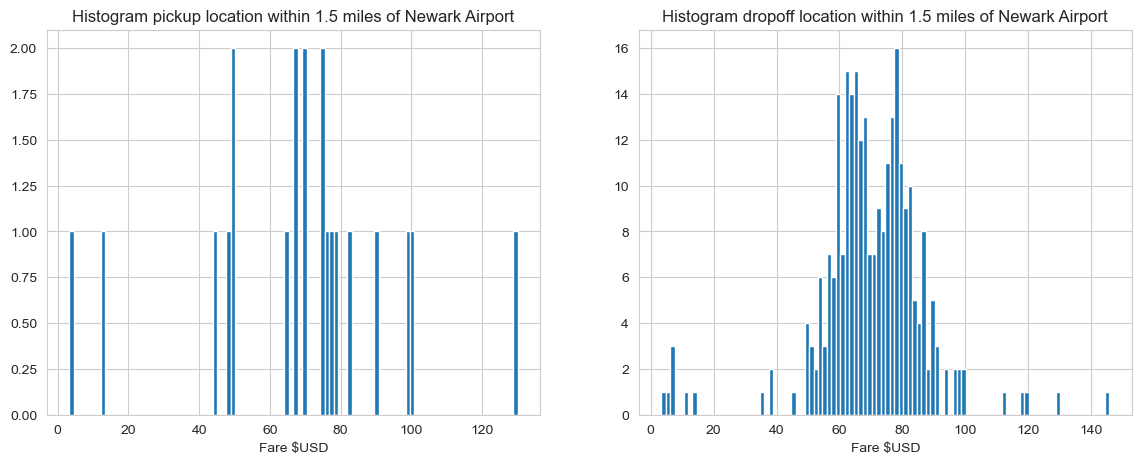

In [43]:
#Other Airports
ewr = (-74.175, 40.69) #Newark Liberty International Airport https://www.travelmath.com/airport/EWR
lgr = (-73.87, 40.77) #Laguardia Airport, https://www.travelmath.com/airport/LGA

plot_location_fare(ewr, 'Newark Airport')

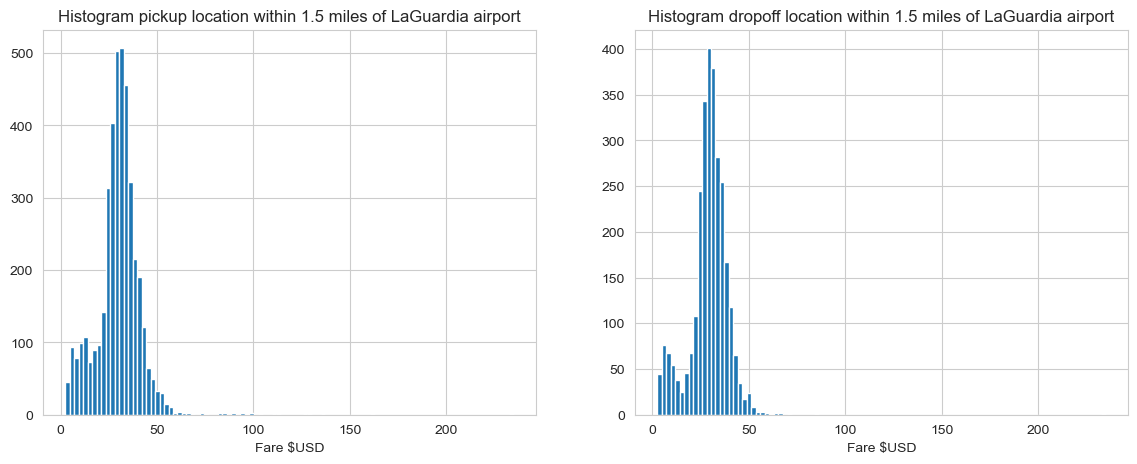

In [44]:
plot_location_fare(lgr, 'LaGuardia airport')

# Fare varies with pickup location

In [45]:
# add new column to dataframe with distance in mile
df_train['distance_to_center'] = distance(nyc[1], nyc[0], df_train["pickup_latitude"], df_train["pickup_longitude"])
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_miles,distance_to_center
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.640487,8.502079
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5.250670,0.543185
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.863411,3.482099
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,1.739386,1.654108
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.242218,4.225834


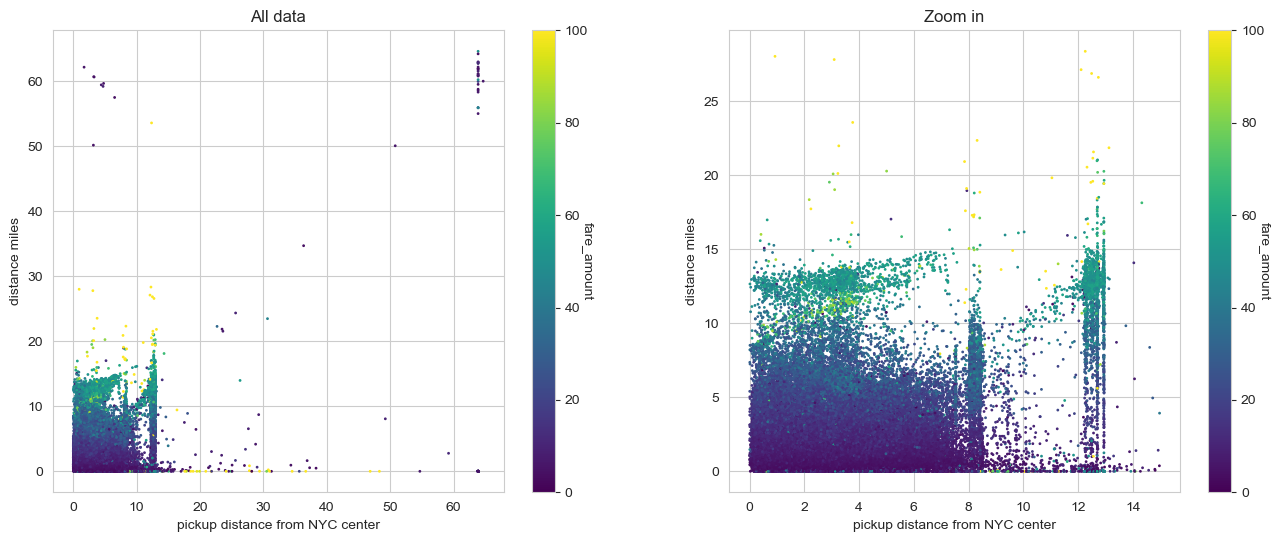

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train["distance_to_center"], df_train["distance_miles"], c=np.clip(df_train["fare_amount"], 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)

axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')

cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)


idx = (df_train["distance_to_center"] < 15) & (df_train["distance_miles"] < 35)
im = axs[1].scatter(df_train[idx]["distance_to_center"], df_train[idx]["distance_miles"], 
                     c=np.clip(df_train[idx]["fare_amount"], 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

### Observation: There are a lot of green dots on the graph, which is about 50 to 60 fare amount near 13 miles distance of NYC center of distance of trip.
-> This could be trip from/To JFK airport